# ASSIGNMENT-6

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pywt
from pywt import wavedec

__1.Generate a real chirp signal. Compute the subband decomposition of this
signal upto three levels and plot the approximate and detail components__

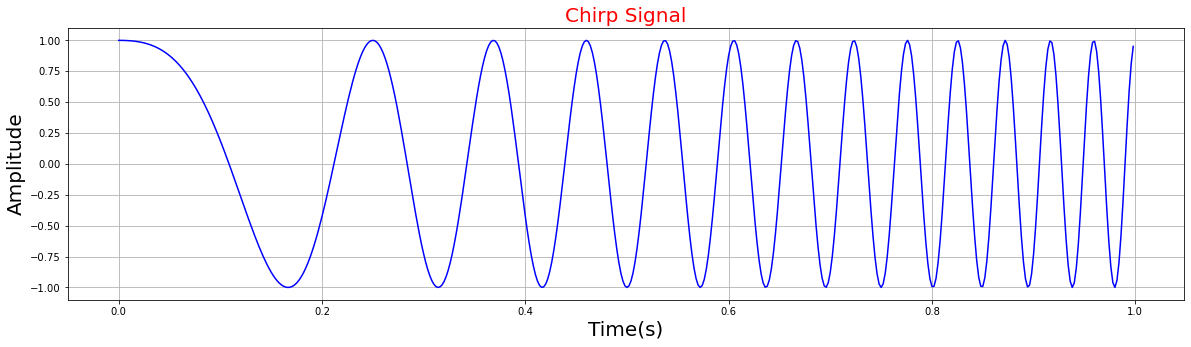

In [2]:
def chirpsignal(t,f0,t1,f1,phase=0):
    t0=t[0]
    T=t1-t0
    k=(f1-f0)/T
    x=np.cos(2*np.pi*(k/2*t+f0)*t+phase)
    return x
fs=500 #sampling frequency
t=np.arange(0,1,1/fs)
f0=1 # starting frequency of the chirp
f1=fs/20 #frequency of the chirp at t1=1 second
x=chirpsignal(t,f0,1,f1)
plt.figure(figsize=(20,5))
plt.plot(t,x,c='b')
plt.title('Chirp Signal',size=20,c='r')
plt.xlabel('Time(s)',size=20);
plt.ylabel('Amplitude',size=20)
plt.grid('True')
plt.show()

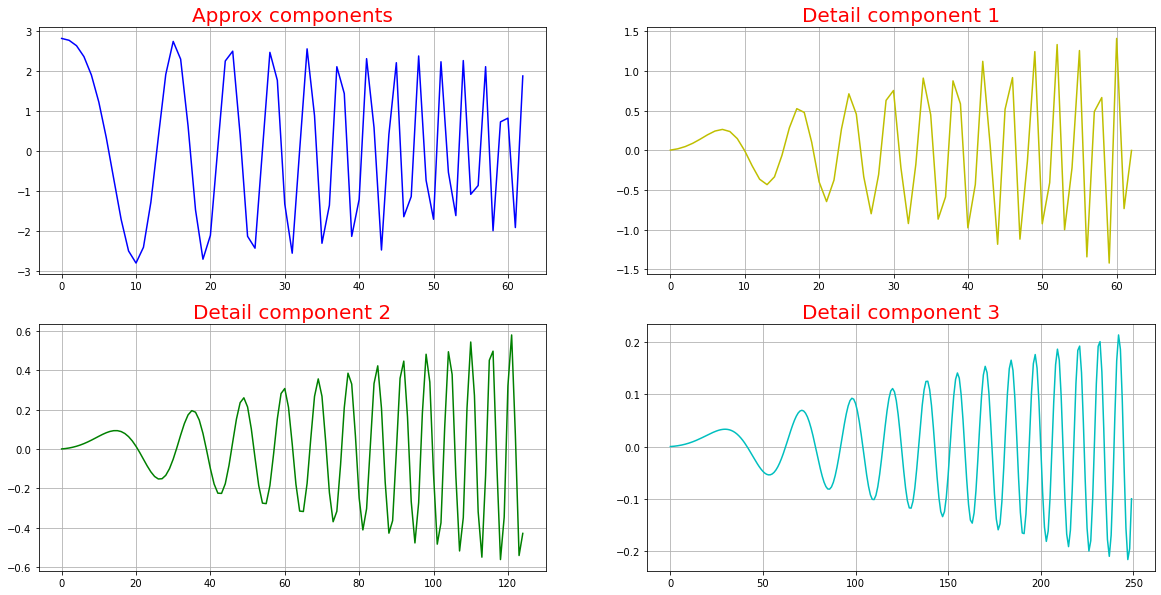

In [3]:
approx_det,coeff_det1,coeff_det2,coeff_det3= wavedec(x, 'db1', level=3)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(approx_det,c='b')
plt.grid('True')
plt.title("Approx components",size=20,c='r')
plt.subplot(2,2,2)
plt.plot(coeff_det1,c='y')
plt.grid('True')
plt.title("Detail component 1",size=20,c='r')
plt.subplot(2,2,3)
plt.plot(coeff_det2,c='g')
plt.grid('True')
plt.title("Detail component 2",size=20,c='r')
plt.subplot(2,2,4)
plt.plot(coeff_det3,c='c')
plt.title("Detail component 3",size=20,c='r')
plt.grid('True')
plt.show()

__2. Consider the sample HeaviSine signal in PyWavelets library. The signal
is added with AWGN and a noisy signal is generated with SNR of 15 dB.__

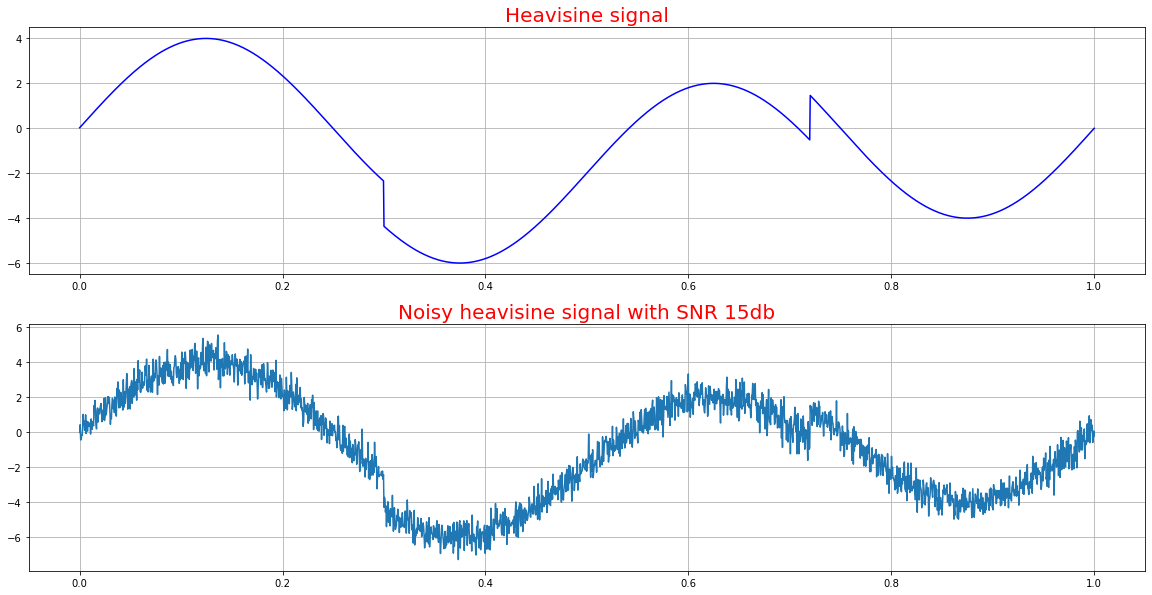

In [4]:
#Plotting the heavisine signal
heavisine=pywt.data.demo_signal(name='HeaviSine', n=2048)
plt.figure(figsize=(20,10))
x = np.linspace(0,1,2**11)
plt.subplot(2,1,1)
plt.plot(x,heavisine,c='b')
plt.title('Heavisine signal',size=20,c='r')
plt.grid('true')
# Adding noise to Heavisine signal
snr_db = 15#Adding Noise of 15 db
# Calculate signal power and convert to dB 
sig_avg = np.mean(heavisine**2)
sig_avg_db = 10*np.log10(sig_avg)
noise_avg_db = sig_avg_db-snr_db
noise_avg = 10**(noise_avg_db / 10)
mean_noise = 0# Generate an sample of white noise
noise = np.random.normal(mean_noise, np.sqrt(noise_avg), len(heavisine))
noisy_signal = heavisine + noise# Noise up the original signal
plt.subplot(2,1,2)
plt.title('Noisy heavisine signal with SNR 15db',size=20,c='r')
plt.plot(x,noisy_signal)
plt.grid('True')

__2.(a) Perform Wavelet decomposition on this signal__

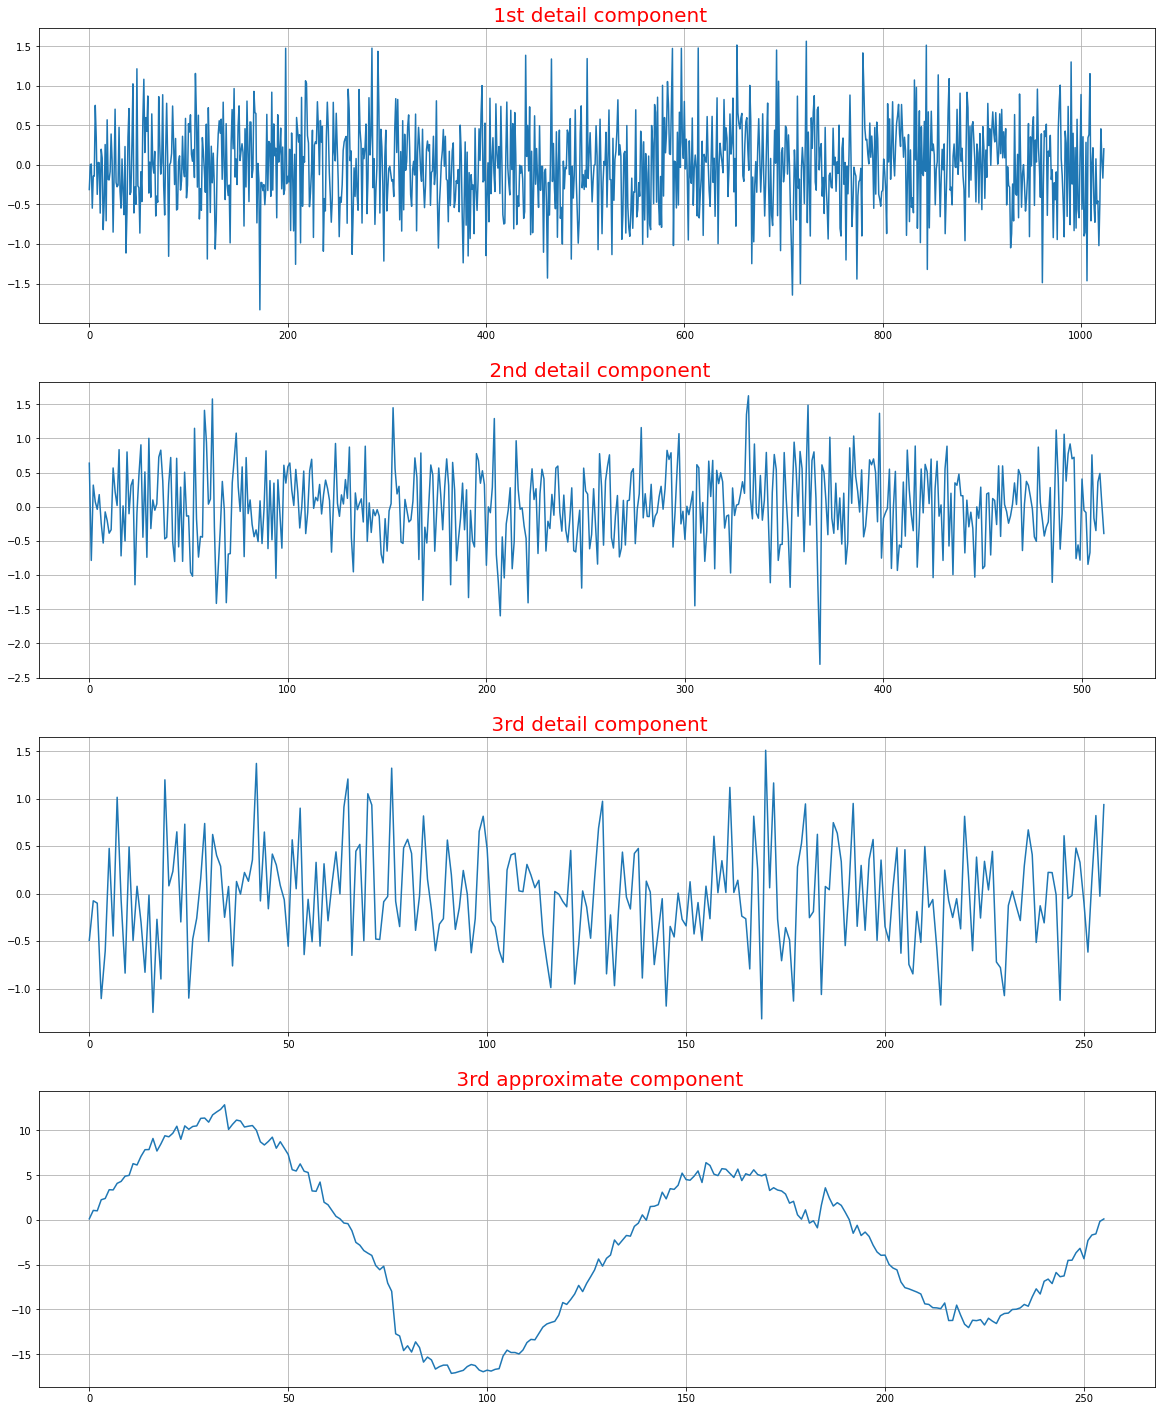

In [5]:
# Wavelet Decomposition
coeff = pywt.wavedec(noisy_signal,'db1', level = 3, mode = 'symmetric')
ca3,cd3,cd2,cd1 = coeff
fig = plt.figure(1,figsize=(20,25))
plt.subplot(4,1,1)
plt.plot(cd1)
plt.grid('True')
plt.title(' 1st detail component',c='r',size=20)
plt.subplot(4,1,2)
plt.plot(cd2)
plt.grid('True')
plt.title(' 2nd detail component',c='r',size=20)
plt.subplot(4,1,3)
plt.plot(cd3)
plt.grid('True')
plt.title(' 3rd detail component',c='r',size=20)
plt.subplot(4,1,4)
plt.plot(ca3)
plt.grid('True')
plt.title(' 3rd approximate component',c='r',size=20)
plt.show()

__2.(b) Use an appropriate thresholding method to denoise the signal__

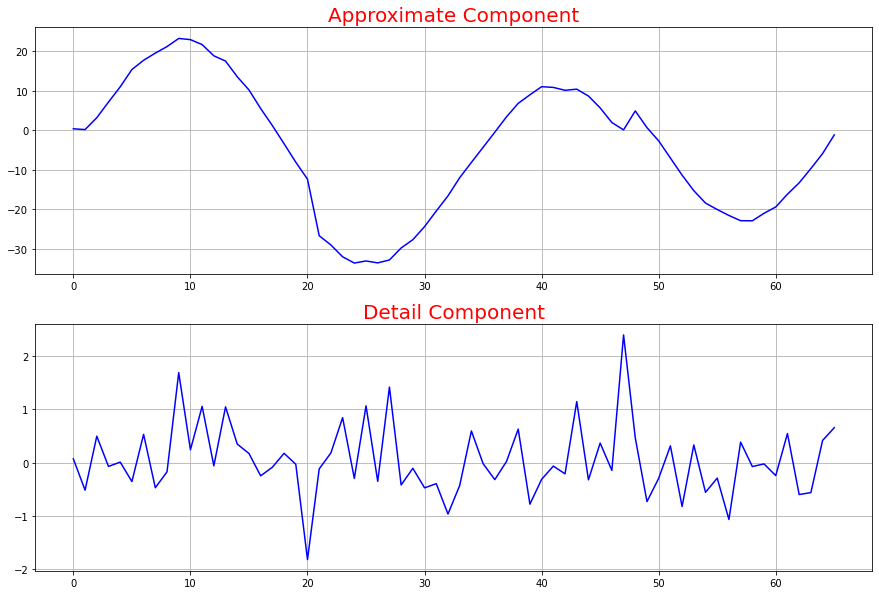

In [6]:
approximation = pywt.downcoef('a',noisy_signal, 'db2', mode='sym', level=5)
detail = pywt.downcoef('d',noisy_signal, 'db2', mode='sym', level=5)

components = [approximation,detail]
name = ["Approximate","Detail"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(components)):
    plt.subplot(2,1,c)
    plt.plot(components[k],c='b')
    plt.title(str(name[k])+" Component",c='r',size=20)
    plt.grid('True')
    c =c+1

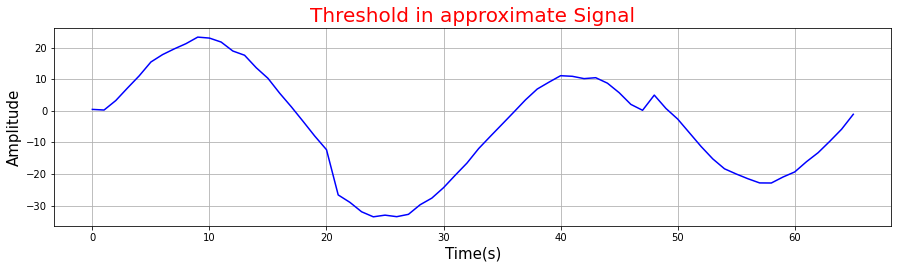

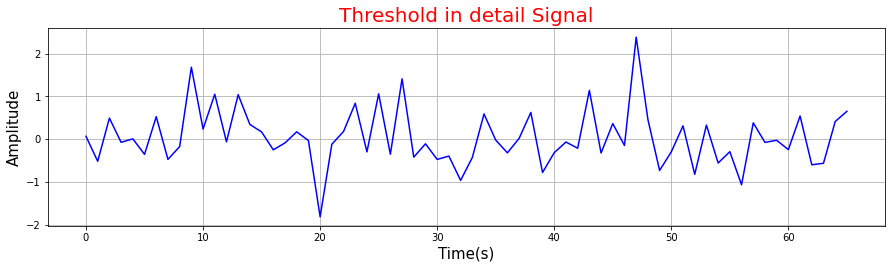

In [7]:
sigma_A = (np.median(approximation)/0.6745)
threshold_A = sigma_A*(np.sqrt(2*np.log(len(approximation))))
approxi_thres = pywt.threshold(approximation,threshold_A,mode= 'hard')
fig =plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(approxi_thres,c='b')
plt.title("Threshold in approximate Signal",c='r',size=20)
plt.xlabel('Time(s)',size=15)
plt.ylabel('Amplitude',size=15)
plt.grid('True')
plt.show()
sigma_D = (np.median(detail)/0.6745)
threshold_D =sigma_D*(np.sqrt(2*np.log(len(detail))))
detail_thres = pywt.threshold(detail,threshold_D,mode="hard")
fig =plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.plot(detail_thres,c='b')
plt.title("Threshold in detail Signal",c='r',size=20)
plt.xlabel('Time(s)',size=15)
plt.ylabel('Amplitude',size=15)
plt.grid('True')
plt.show()

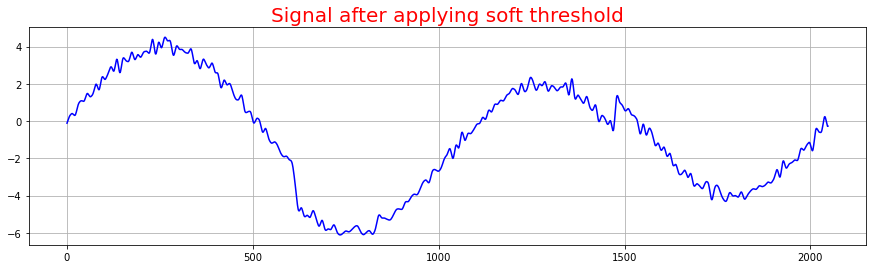

In [8]:
# Applying soft thresholding for removing the noise
from skimage.restoration import denoise_wavelet
dns=denoise_wavelet(noisy_signal, method = 'BayesShrink', mode ='soft',wavelet_levels =3,wavelet='sym8',rescale_sigma ='True')
fig = plt.figure(1,figsize=(15,4))
plt.plot(dns,c='b')
plt.title("Signal after applying soft threshold",c='r',size=20)
plt.grid('True')
plt.show()

__2.(c) Reconstruct the signal and compare it with the original signal__

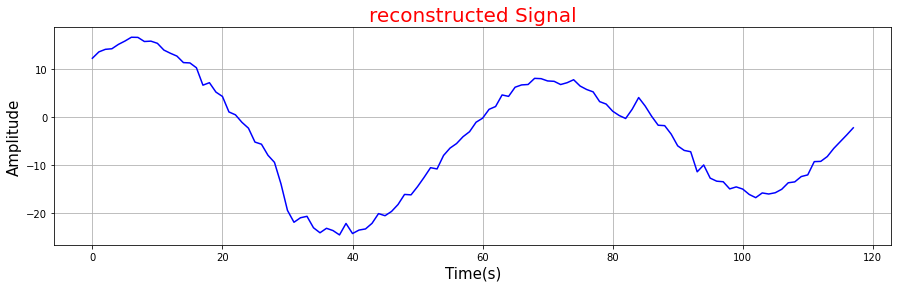

In [9]:
out = pywt.idwt(approxi_thres,detail_thres, wavelet='db8', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
plt.plot(out,c='b')
plt.title("reconstructed Signal",c='r',size=20)
plt.xlabel('Time(s)',size=15)
plt.ylabel('Amplitude',size=15)
plt.grid('True')
plt.show()

__3. Download the NASA’s Femto Bearing Dataset from here. This is a dataset
containing high frequency sensor data regarding accelerated degradation
of bearings__


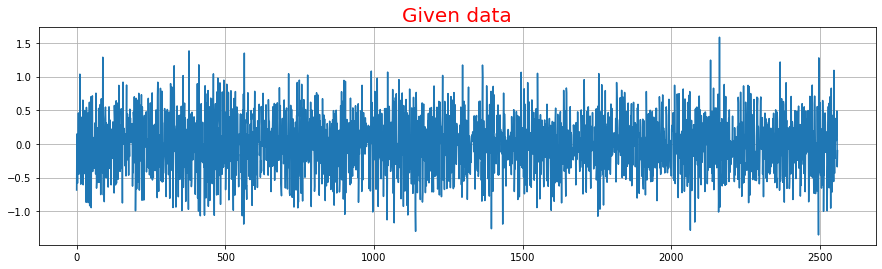

In [10]:
import pandas as pd
# Reading the dataset::
column_name=['A','B','C','D','E','F']
data=pd.read_csv('NasaFemtoBearingDataset.csv',names=column_name)
Data=data['F']
fig = plt.figure(1,figsize=(15,4))
plt.plot(Data)
plt.title("Given data",c='r',size=20)
plt.grid('True')
plt.show()

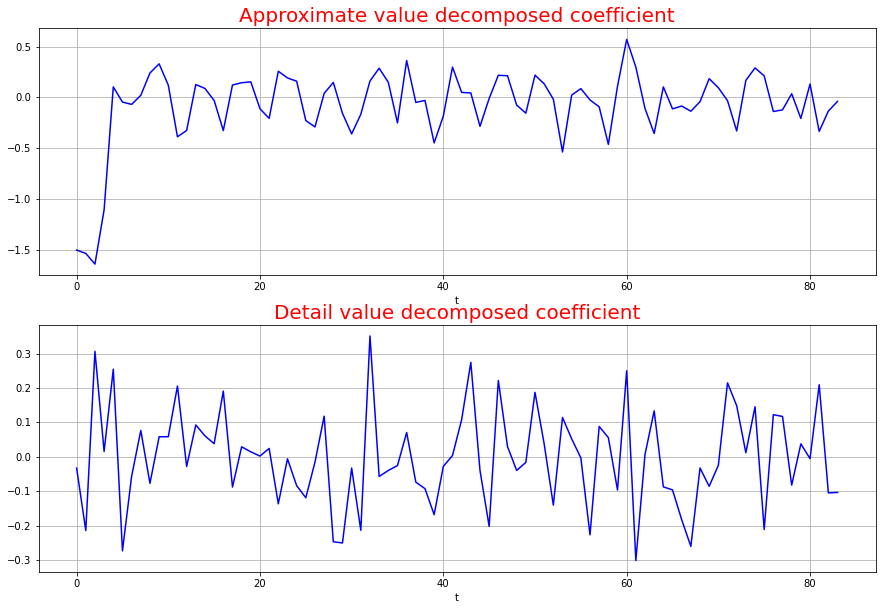

In [11]:
approx_coeff= pywt.downcoef('a',Data, 'db3', mode='sym', level=5)
detail_coeff = pywt.downcoef('d',Data, 'db3', mode='sym', level=5)
decomposed_coeff= [approx_coeff,detail_coeff]
title_name= ["Approximate value","Detail value"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(decomposed_coeff)):
    plt.subplot(2,1,c)
    plt.plot(decomposed_coeff[k],c='b')
    plt.title(str(title_name[k])+" decomposed coefficient",c='r',size=20)
    plt.xlabel("t")
    plt.grid('True')
    c =c+1 

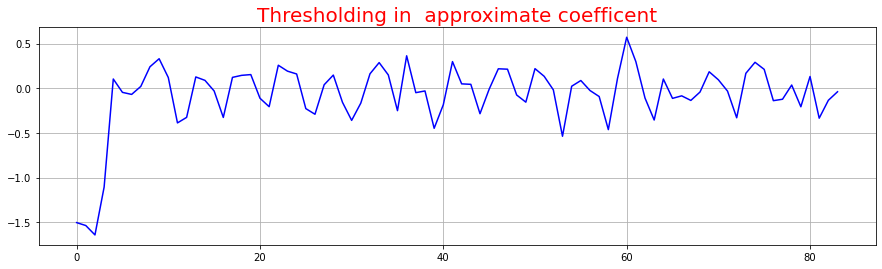

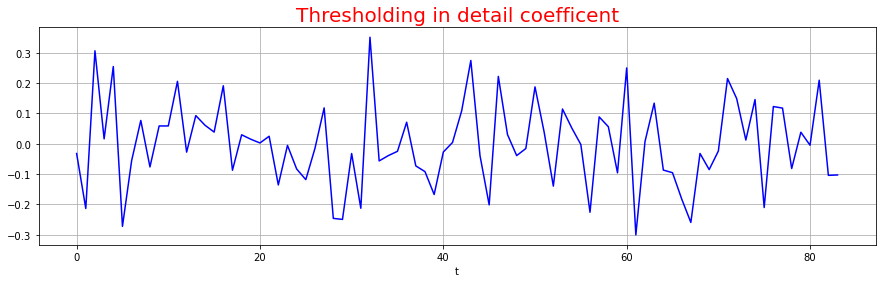

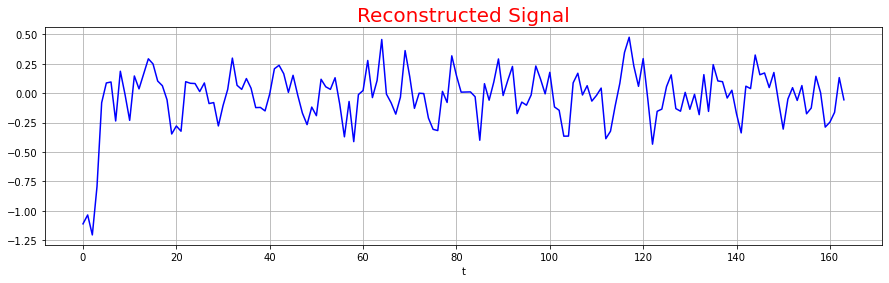

In [12]:
# Thresholding
sigma_Approx = (np.median(approx_coeff)/0.6745)
threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approx_coeff))))
approxi_thres = pywt.threshold(approx_coeff,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
plt.plot(approxi_thres,c='b')
plt.grid('True')
plt.title("Thresholding in  approximate coefficent",c='r',size=20)

sigma_Detail = (np.median(detail_coeff)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_coeff))))
detail_thres = pywt.threshold(detail_coeff,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
plt.plot(detail_thres,c='b')
plt.title("Thresholding in detail coefficent",c='r',size=20)
plt.xlabel('t')
plt.grid('True')

# Reconstruction of signal
reconstruct_signal= pywt.idwt(approxi_thres,detail_thres, wavelet='db3', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
plt.plot(reconstruct_signal,c='b')
plt.title("Reconstructed Signal",c='r',size=20)
plt.xlabel('t')
plt.grid('True')
plt.show()

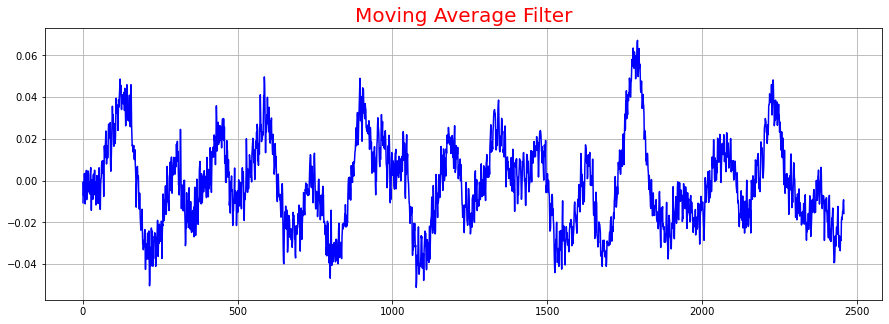

In [13]:
# Moving average filter
def movingavg(signal,p):
    maavg=list()
    for i in range(p,len(signal)):
        avg=0
        for j in range(p):
            avg+=(signal[i-j-1])/p
        maavg.append(avg)
    return np.array(maavg)
Movingavg=movingavg(Data,100)
plt.figure(figsize=(15,5))
plt.plot(Movingavg,c='b')
plt.title("Moving Average Filter",c='r',size=20)
plt.grid('True')
plt.show()